In [1]:
!pip install geopandas
!pip install contextily
import geopandas 
import contextily as ctx

     |████████████████████████████████| 1.0 MB 4.8 MB/s 
     |████████████████████████████████| 6.3 MB 50.4 MB/s 
     |████████████████████████████████| 15.4 MB 77 kB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [3]:
autostrade = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Autostrade_10000_CT10_line/Autostrade_10000_CT10_line.dbf')
autostrade

,TS_EID,COD_PE,PERCORSO,geometry
0,19.0,A21,AUTOSTRADA TORINO- PIACENZA- BRESCIA,"LINESTRING (496352.634 4981573.415, 496378.384..."
1,18.0,A21,AUTOSTRADA TORINO- PIACENZA- BRESCIA,"LINESTRING (580517.421 4994637.417, 580735.915..."
2,21.0,A21,AUTOSTRADA TORINO- PIACENZA- BRESCIA,"LINESTRING (580524.796 4994628.417, 580745.039..."
3,65.0,A50,TANGENZIALE OVEST DI MILANO,"LINESTRING (521699.514 5024872.823, 521630.139..."
4,62.0,A50,TANGENZIALE OVEST DI MILANO,"LINESTRING (504384.530 5044095.266, 504414.405..."
5,90.0,A51,TANGENZIALE EST DI MILANO,"LINESTRING (519364.775 5030574.241, 519401.151..."
6,78.0,A51,TANGENZIALE EST DI MILANO,"LINESTRING (519346.650 5030596.741, 519377.151..."
7,7.0,A1,AUTOSTRADA MILANO - ROMA,"LINESTRING (519364.775 5030574.241, 519352.525..."
8,8.0,A1,AUTOSTRADA MILANO - ROMA,"LINESTRING (519346.650 5030596.741, 519337.900..."
9,1922.0,A8,AUTOSTRADA MILANO- VARESE,"LINESTRING (485557.854 5069342.204, 485588.231..."


In [4]:
autostrade.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

1. Visualizzare su una mappa i confini delle province lombarde e le autostrade. Le autostrade devono essere in grigio e i confini delle province in nero. (2 pt.)

In [10]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g")
regioni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf')
province

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


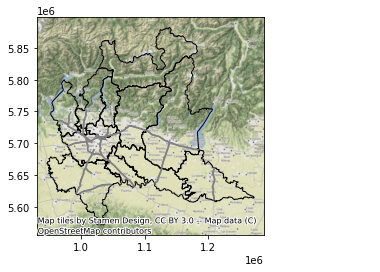

In [9]:
lombardia = regioni.loc[regioni['DEN_REG'] == 'Lombardia', 'geometry'].squeeze()
prov_lombardia = province[province.within(lombardia)]
ax = autostrade.to_crs(epsg=3857).plot(color='grey')
prov_lombardia.to_crs(epsg=3857).plot(ax=ax, facecolor='none', edgecolor='k')
ctx.add_basemap(ax)

2. Visualizzare su una mappa le province attraversate da una certa autostrade inserita dall'utente. Controllare che l'autostrada sia effettivamente esistente: in caso contrario fornire un opportuno messaggio d'errore. Colorare le province in verde, facendo in modo che la mappa al di sotto risulti visibile (3 pt.)

Inserire un autostrada: AUTOSTRADA MILANO - ROMA


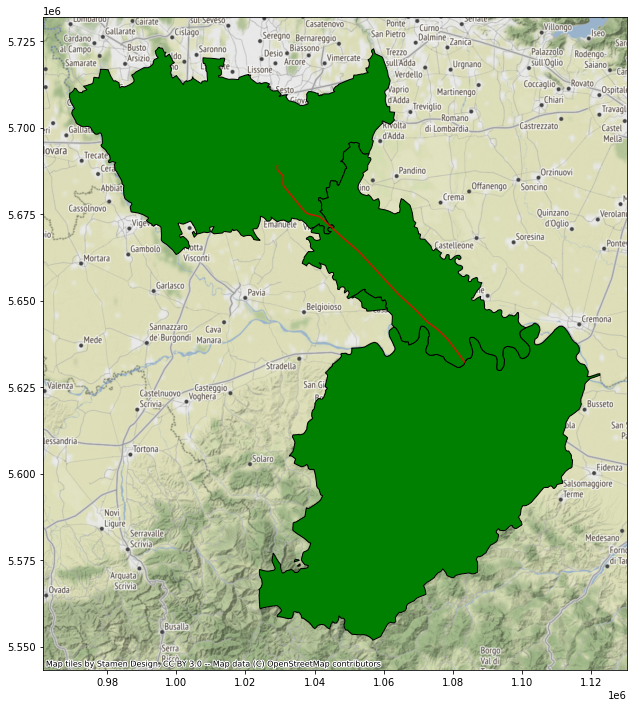

In [27]:
user = input('Inserire un autostrada: ')
lst = list(autostrade['PERCORSO'])
if user not in lst:
  print('Autostrada inesistente')
else:
  auto = autostrade[autostrade.PERCORSO == user]
  autoprov = province[province.intersects(auto.unary_union)]
  ax = autoprov.to_crs(epsg=3857).plot(figsize=(20,12), facecolor='green', edgecolor='k')
  auto.to_crs(epsg=3857).plot(ax=ax, color='r', alpha=0.5)
  ctx.add_basemap(ax)

3. Visualizzare tutti i comuni che si trovano ad una certa distanza da una autostrada. L'utente inserisce il nome dell'autostrada e la distanza e il programma deve visualizzare una mappa con l'autostrada in nero e i comuni in rosso (trasparente) (2 pt.)

In [28]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g")

A21
727


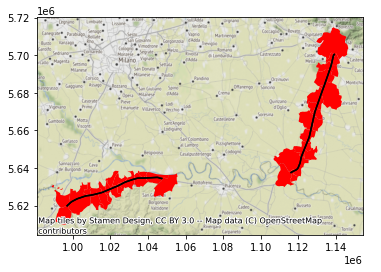

In [29]:
comune = comuni[comuni.within(regioni[regioni.DEN_REG.str.contains('Lombardia')].geometry.squeeze())]
userroad = input()
distance = float(input())

ax = comuni[comuni.distance(autostrade[autostrade.COD_PE == userroad].unary_union) <= distance].to_crs(epsg=3857).plot(facecolor='r')
autostrade[autostrade.COD_PE == userroad].to_crs(epsg=3857).plot(ax=ax, color='k')
ctx.add_basemap(ax)

4. Visualizzare su una mappa i parchi lombardi che non sono attraversati da nessuna autostrada (2 pt.)

In [30]:
parchi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon/Parchi_regionali_e_nazionali_polygon.dbf")

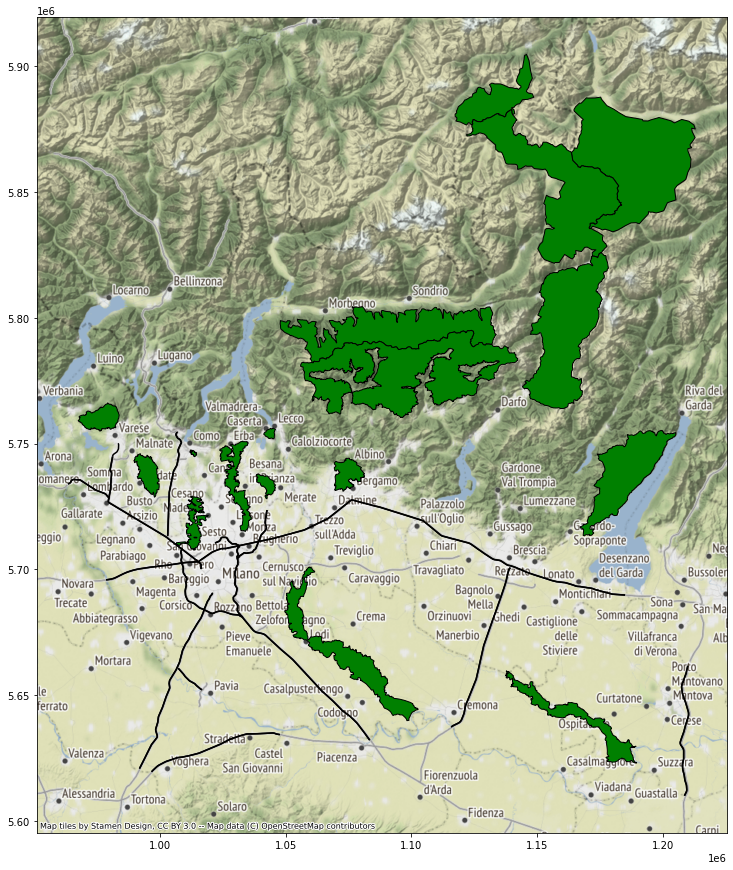

In [36]:
parco = parchi[parchi.within(regioni[regioni.DEN_REG.str.contains('Lombardia')].geometry.squeeze())]
ax = parchi[parchi.intersects(autostrade.unary_union) == False].to_crs(epsg=3857).plot(edgecolor='k',facecolor='g', figsize=(20,15))
autostrade.to_crs(epsg=3857).plot(ax=ax, color='k')
ctx.add_basemap(ax)